# 6.2 Exploring Relationships

## Table of Contents
1. Import Libraries 
2. Import Dataframe  
3. Create a Correlation Matrix Heatmap  
Discuss coefficients 
4. Create a Scatterplot  
Discuss output
5. Create a Pair Plot  
Observations
6. Create a Categorical Plot  
Observations
7. Revisit Project Questions & provide answers as well as Hypotheses
8. Export Dataframe  

## 1. Import Libraries

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import scipy

## 2. Import Dataframe

In [2]:
# Defining path first
path = r'C:\Users\clany\OneDrive\Documents\CareerFoundry\Chap 6_Sourcing Open Data\World Happiness Analysis'

In [3]:
# Importing the dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'World_Happiness_All.csv'), index_col = False)

In [4]:
# Checking the shape of the df
df.shape

(1367, 11)

#### Data Verification

In [5]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,overall_rank
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5


In [6]:
df

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,overall_rank
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5
...,...,...,...,...,...,...,...,...,...,...,...
1362,Congo (Kinshasa),Sub-Saharan Africa,3.207,0.53100,0.78400,0.10500,0.37500,0.18300,0.06800,2023,133
1363,Zimbabwe,Sub-Saharan Africa,3.204,0.75800,0.88100,0.06900,0.36300,0.11200,0.11700,2023,134
1364,Sierra Leone,Sub-Saharan Africa,3.138,0.67000,0.54000,0.09200,0.37100,0.19300,0.05100,2023,135
1365,Lebanon,Middle East and North Africa,2.392,1.41700,0.47600,0.39800,0.12300,0.06100,0.02700,2023,136


In [7]:
# Check Columns name
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'overall_rank'],
      dtype='object')

In [8]:
# Display all columns 
pd.set_option('display.max_columns', None)

In [9]:
# Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1367 entries, 0 to 1366
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       1367 non-null   object 
 1   region                        1367 non-null   object 
 2   happiness_score               1367 non-null   float64
 3   gdp_per_capita                1367 non-null   float64
 4   social_support                1367 non-null   float64
 5   healthy_life_expectancy       1366 non-null   float64
 6   freedom_to_make_life_choices  1367 non-null   float64
 7   generosity                    1367 non-null   float64
 8   perceptions_of_corruption     1366 non-null   float64
 9   year                          1367 non-null   int64  
 10  overall_rank                  1367 non-null   int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 117.6+ KB


## 3. Create a Correlation Matrix Heatmap

### Creating a Corona Flag  
As part of the questions to explore, I want to find out how COVID-19 has altered different aspects of life in the happiness scores during the pandemy. For this purpose, a new column for Corona periods is to be created.

In [14]:
# Define the years impacted by Covid
df.loc[df['year'].isin([2020,2021,2022,2023]), 'year_loc'] = 'Covid'
df['year_loc'] = df['year_loc'].astype(str)

In [15]:
# Define the years before Covid
df.loc[df['year'].isin([2015,2016,2017,2018,2019]), 'year_loc'] = 'Before Covid'
df['year_loc'] = df['year_loc'].astype(str)

In [16]:
df['year_loc'].value_counts(dropna = False)

year_loc
Before Covid    782
Covid           585
Name: count, dtype: int64

In [17]:
df.head()

,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year,overall_rank,year_loc
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015,1,Before Covid
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015,2,Before Covid
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015,3,Before Covid
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015,4,Before Covid
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015,5,Before Covid


In [19]:
# changing year data type from integer to string
df['year'] = df['year'].astype('float')

In [20]:
# changing overall_rank data type from integer to string
df['overall_rank'] = df['overall_rank'].astype('float')

In [21]:
df.dtypes

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                            float64
overall_rank                    float64
year_loc                         object
dtype: object

### Create a subset to pick variables suitable for exploratory visual analysis to answer the questions

In [24]:
# Create a subset
df_hap = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'overall_rank']]

In [25]:
# Create a correlation matrix using pandas
df_hap.corr()

,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,overall_rank
happiness_score,1.000000,0.723810,0.648155,0.682400,0.569458,0.082345,0.415071,-0.986531
gdp_per_capita,0.723810,1.000000,0.522092,0.564953,0.439453,-0.153904,0.338105,-0.736741
social_support,0.648155,0.522092,1.000000,0.561274,0.364927,-0.006385,0.147278,-0.645972
healthy_life_expectancy,0.682400,0.564953,0.561274,1.000000,0.261374,0.025932,0.256215,-0.680657
freedom_to_make_life_choices,0.569458,0.439453,0.364927,0.261374,1.000000,0.157050,0.433718,-0.556397
generosity,0.082345,-0.153904,-0.006385,0.025932,0.157050,1.000000,0.224344,-0.062367
perceptions_of_corruption,0.415071,0.338105,0.147278,0.256215,0.433718,0.224344,1.000000,-0.393576
overall_rank,-0.986531,-0.736741,-0.645972,-0.680657,-0.556397,-0.062367,-0.393576,1.000000


### Create a correlation heatmap using matplotlib

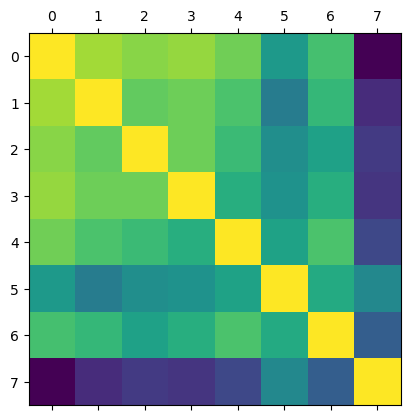

In [26]:
# Create a correlation heatmap using matplotlib
plt.matshow(df_hap.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

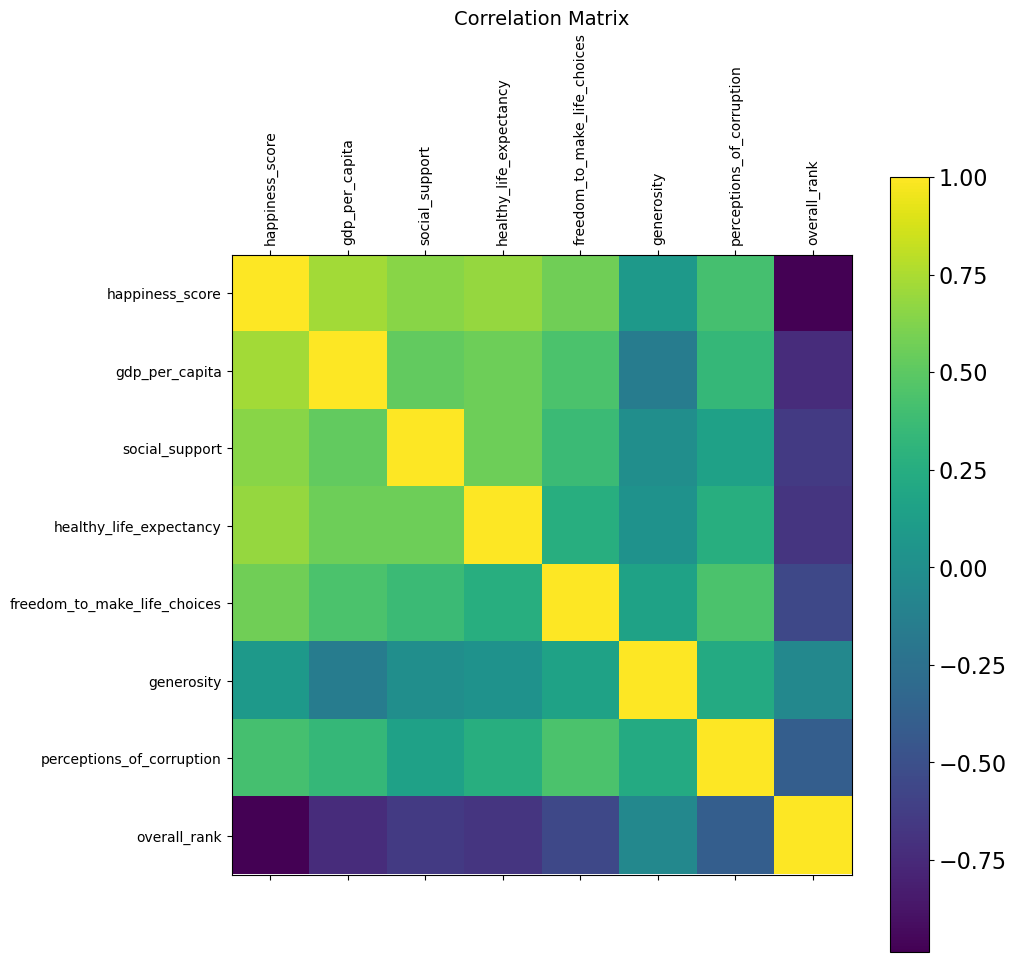

In [27]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(10, 10)) # figure size 
plt.matshow(df_hap.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_hap.shape[1]), df_hap.columns, fontsize=10, rotation=90) # x axis labels
plt.yticks(range(df_hap.shape[1]), df_hap.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=16) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

### Create a correlation heatmap using seaborn

In [28]:
df_hap.columns

Index(['happiness_score', 'gdp_per_capita', 'social_support',
       'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'overall_rank'],
      dtype='object')

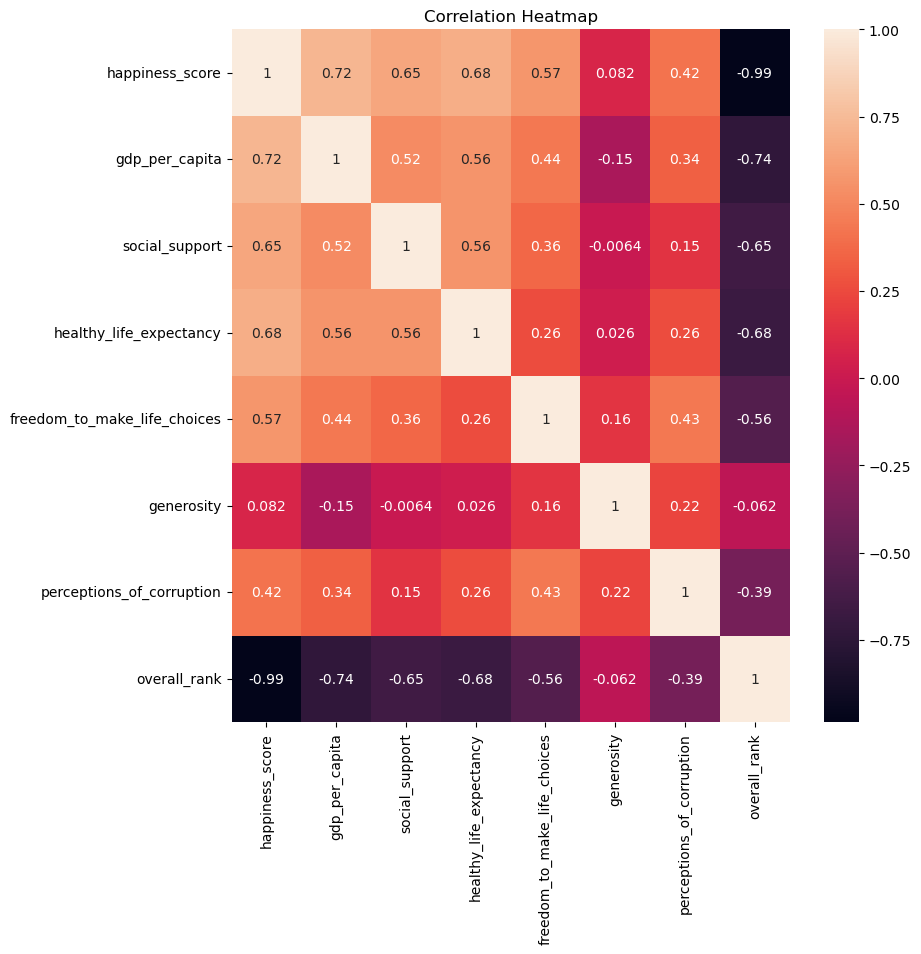

<Figure size 640x480 with 0 Axes>

In [29]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(9,9))
corr_matrix = df_hap.corr()
sns.heatmap(corr_matrix, annot = True)
plt.title('Correlation Heatmap')
plt.show()
plt.savefig(os.path.join(path, 'Heatmap_Correlation_2'),bbox_inches='tight', pad_inches=0.1)

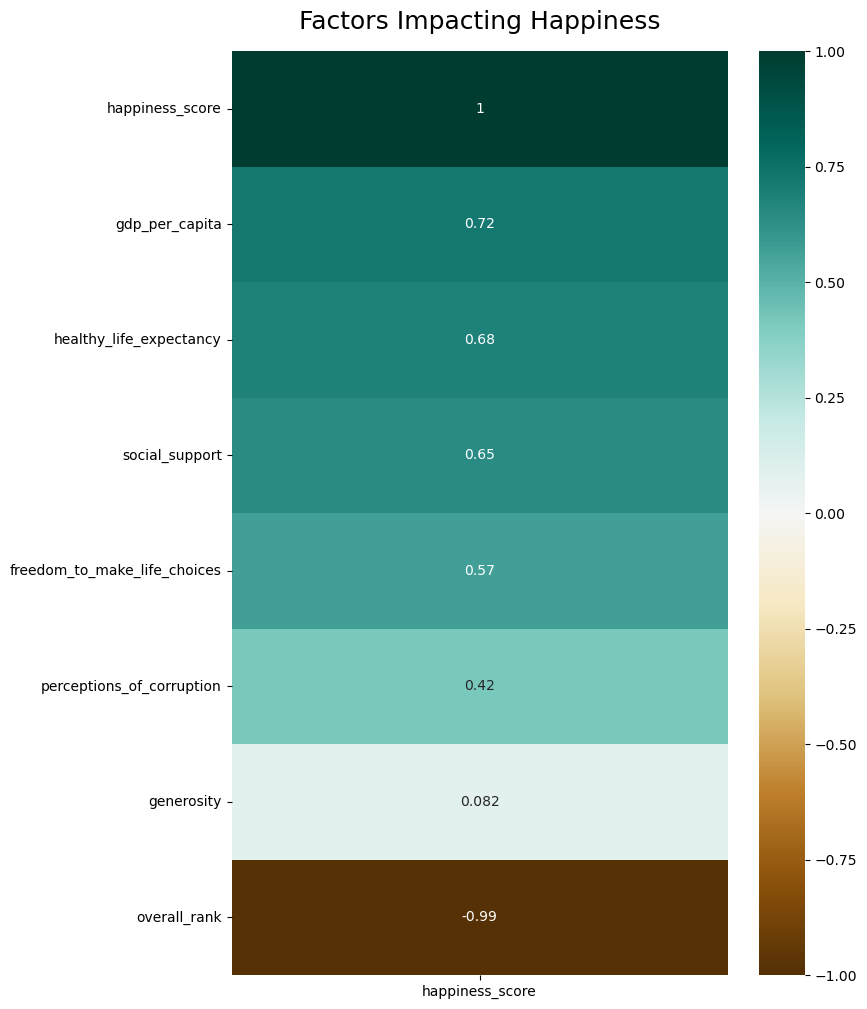

In [30]:
# Create sorted heatmap
plt.figure(figsize=(8, 12))
sorted_hm = sns.heatmap(df_hap.corr()[['happiness_score']].sort_values(by = 'happiness_score', ascending = False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
sorted_hm.set_title('Factors Impacting Happiness', fontdict={'fontsize':18}, pad=16);

### Discuss what the coefficients in the plot mean in terms of the relationships between the variables

**Coefficients meaning:**  
0 - no relationship,  
0.1 - 0.3 - weak relationship,  
0.3 - 0.5 - moderate relationship,  
0.5 - 1 strong relationship    
  
Happiness Score plays the role of independent variable in this analysis, the other six factors can be defined as the dependent variables.   
A strong relationship can be observed between Happiness Score and GDP_per_Capita, health and social support. A strong relationship suggests that these variables tend to move together, but does however not imply their interdependencies with each other.  
The weakest relationship to the happiness score as well as to all other dependent variables in this analysis can be seen to be ´generosity´(donations to charity), with its consistent low values with all other variables.   

## 4. Create Scatterplots

#### Creating Scatterplots for the variables with the strongest correlations

Text(0.5, 1.0, 'Relationship Happiness Score/gdp_per_capita')

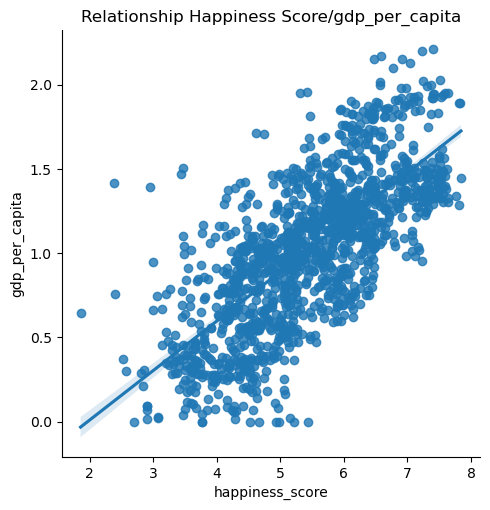

In [31]:
# Create a scatterplot for the Happiness Score and GDP per Capita columns in seaborn
sns.lmplot(x = 'happiness_score', y = 'gdp_per_capita', data = df)
plt.title('Relationship Happiness Score/gdp_per_capita')

Text(0.5, 1.0, 'Relationship Happiness Score/Healthy Life Expectancy')

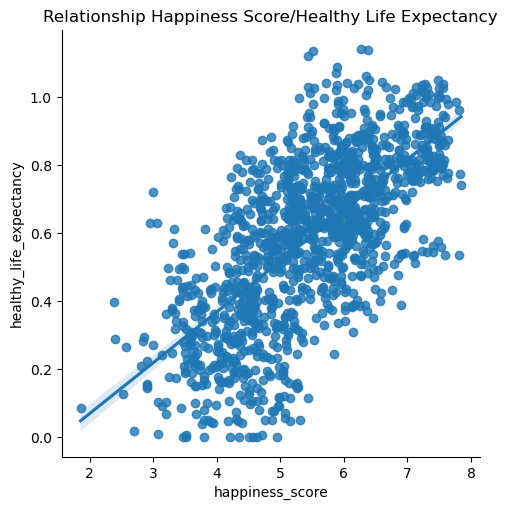

In [32]:
# Create a scatterplot for the Happiness Score and Health columns in seaborn
sns.lmplot(x = 'happiness_score', y = 'healthy_life_expectancy', data = df)
plt.title('Relationship Happiness Score/Healthy Life Expectancy')

Text(0.5, 1.0, 'Relationship Happiness Score/Social Support')

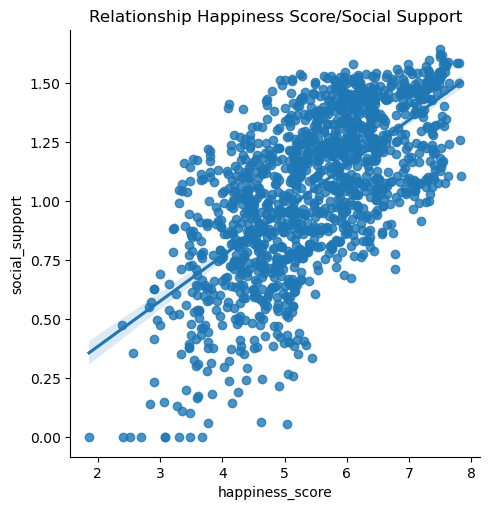

In [33]:
# Create a scatterplot for the Happiness Score and Social support columns in seaborn
sns.lmplot(x = 'happiness_score', y = 'social_support', data = df)
plt.title('Relationship Happiness Score/Social Support')

Text(0.5, 1.0, 'Relationship Healthy Life Expectancy/Social Support')

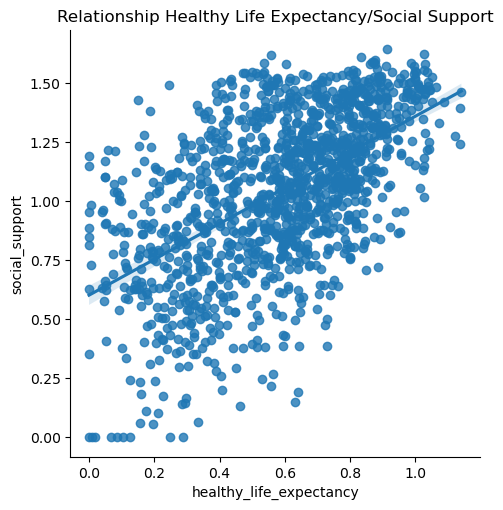

In [34]:
# Create a scatterplot for the Health and Social support columns in seaborn
sns.lmplot(x = 'healthy_life_expectancy', y = 'social_support', data = df)
plt.title('Relationship Healthy Life Expectancy/Social Support')

Text(0.5, 1.0, 'Relationship Health/GDP Per Capita')

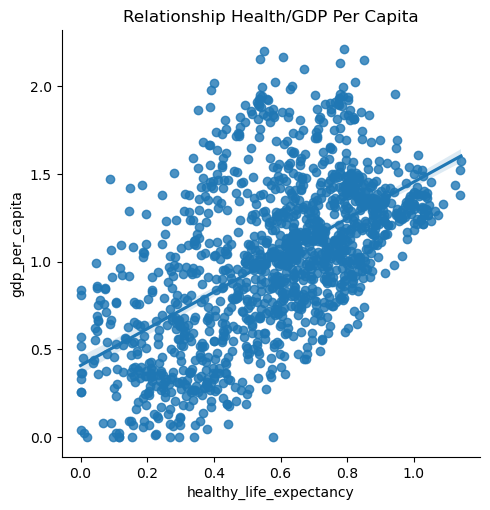

In [35]:
# Create a scatterplot for the gdp and health columns in seaborn
sns.lmplot(x = 'healthy_life_expectancy', y = 'gdp_per_capita', data = df)
plt.title('Relationship Health/GDP Per Capita')


**Observations:** A robust positive linear correlation exists among 'Happiness_Score,' 'GDP_per_Capita,' 'Health,' and 'Social support.' This implies that an increase in the values of these indicators is associated with a corresponding increase in the Happiness_Score. A discernible trend emerges, indicating that nations with elevated GDP_per_capita, and healthy outcomes, and enhanced social support tend to report higher happiness scores.

## 5. Create a Pairplot of the entire data set

In [36]:
# Keep only the variables to use in the pair plot

df_2 = df[['happiness_score', 'gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 'perceptions_of_corruption']]

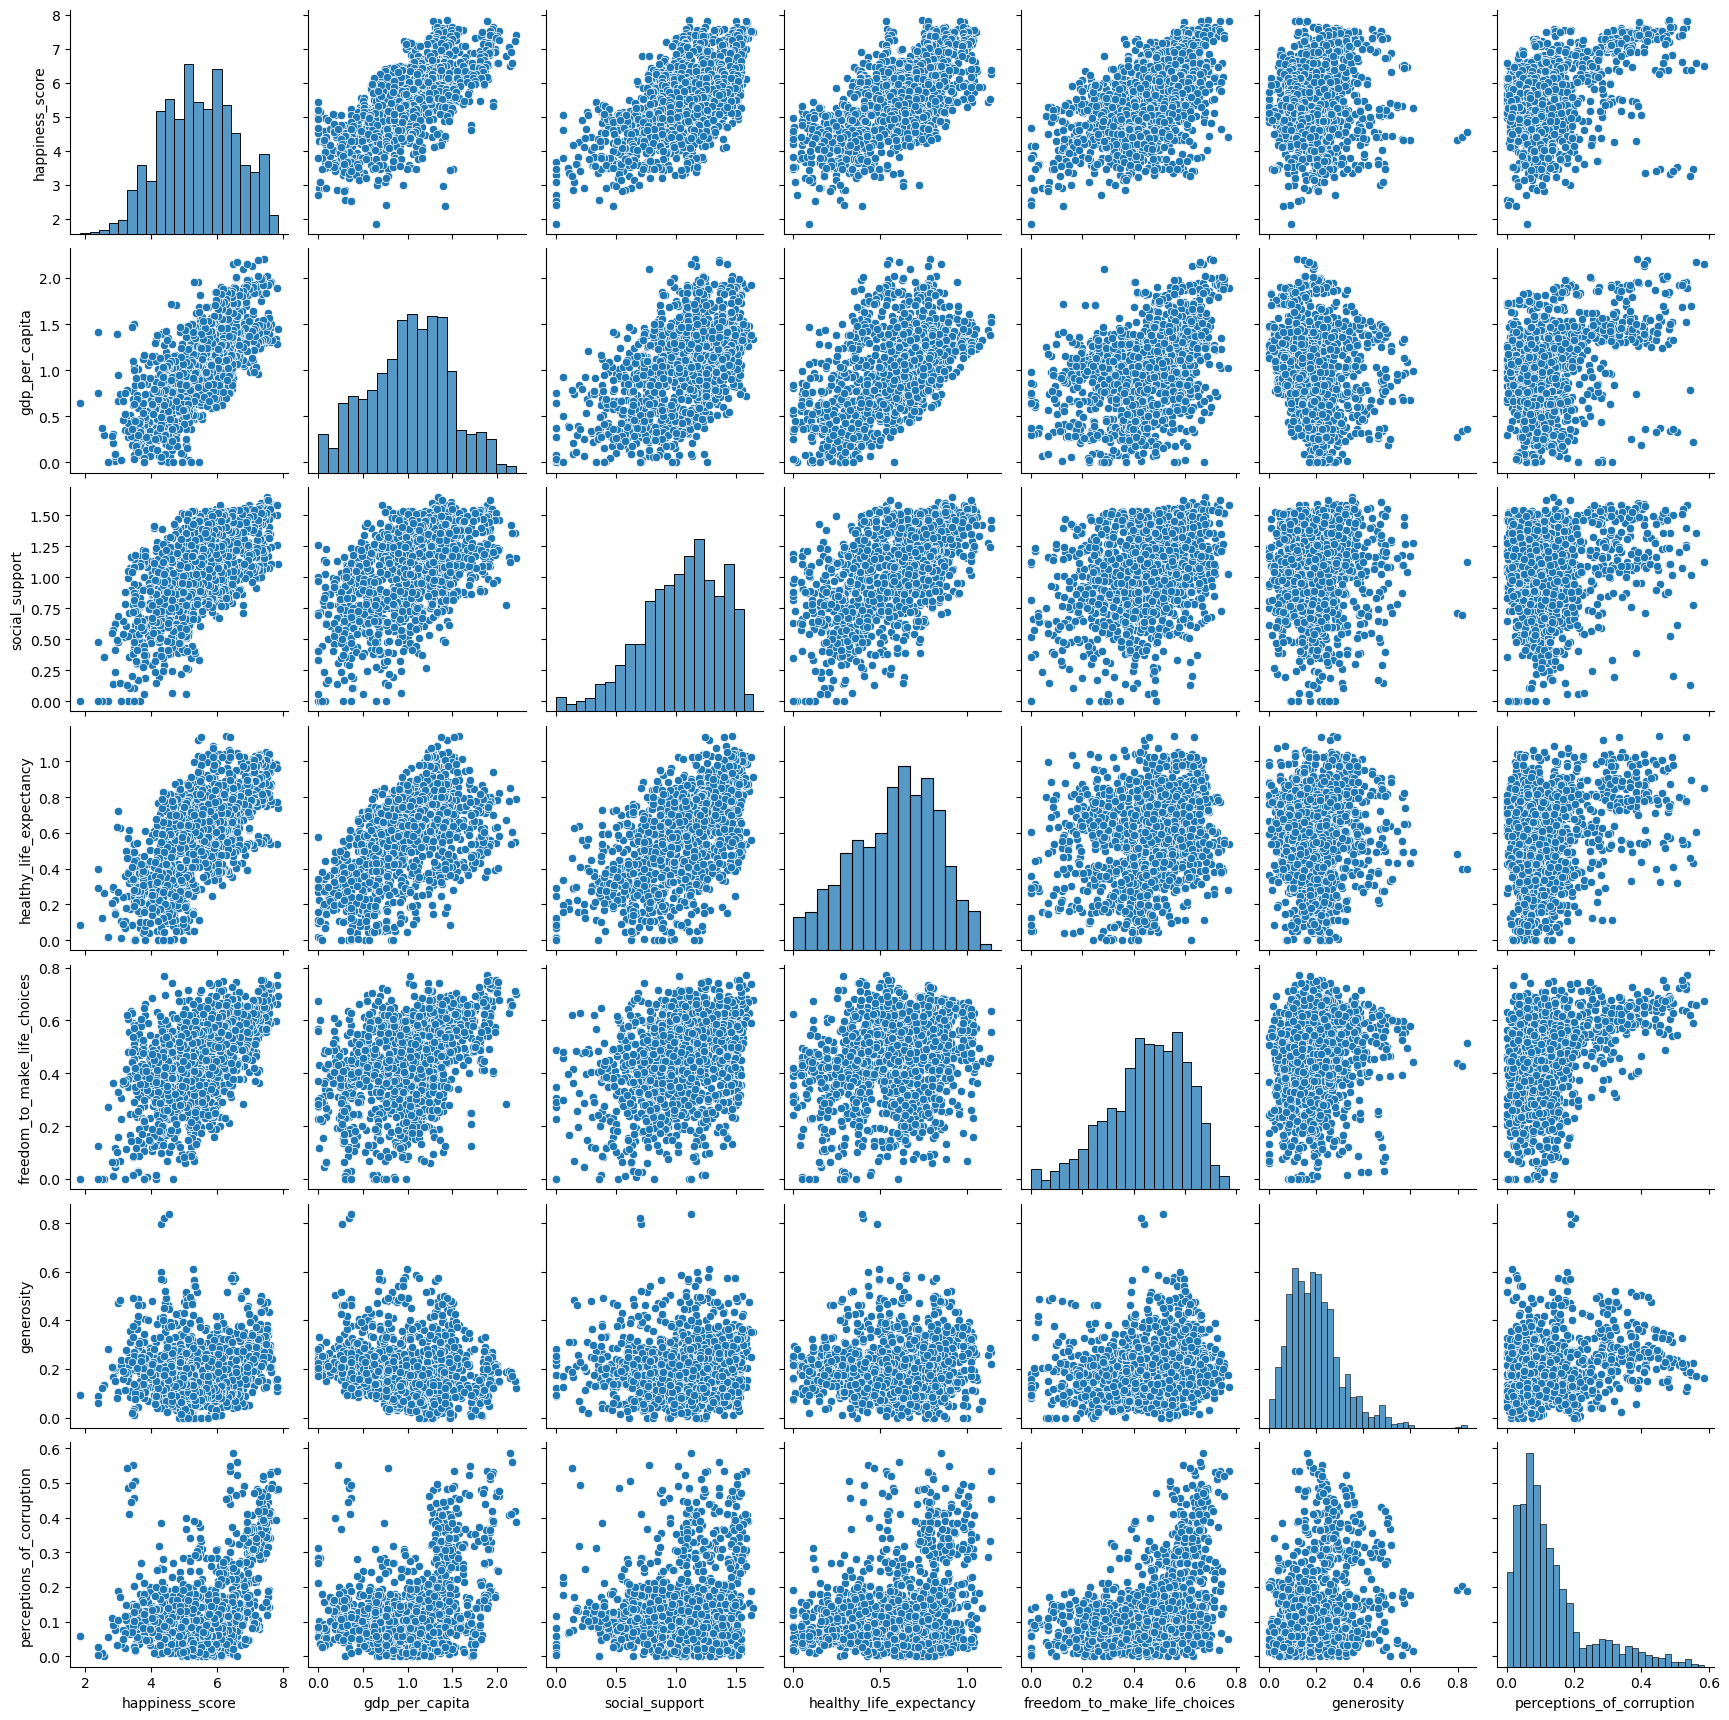

In [37]:
# Create a pair plot 

g = sns.pairplot(df_2)

**Observations:**  
Observing the positioning of histogram peaks reveals the following patterns:
- 'Corruption' exhibits positive skewness, with a peak to the left of the mean.  
- 'Generosity' displays a symmetric distribution centered around the mean, albeit with a few extreme values.
- 'Happiness_Score' demonstrates a bimodal distribution characterized by two distinct peaks.

The alignment of variable distributions corresponds with the patterns observed in the scatterplots and correlation heat maps. Notably, a potential correlation emerges between 'social support' and both 'health' and 'freedom'. Further exploration could be done to understand the relationships involving 'happiness score' and 'gdp per capita', 'health and happiness score', and 'gdp per capita and health'. These relationships can be interesting due to their significant positive correlations. The objective is to delve into how factors like health and GDP influence the happiness score and examine how a country's GDP impacts its overall perspective on health.

## 6. Create a Categorical Plot

Text(0.5, 1.0, 'Histogram Happiness Score')

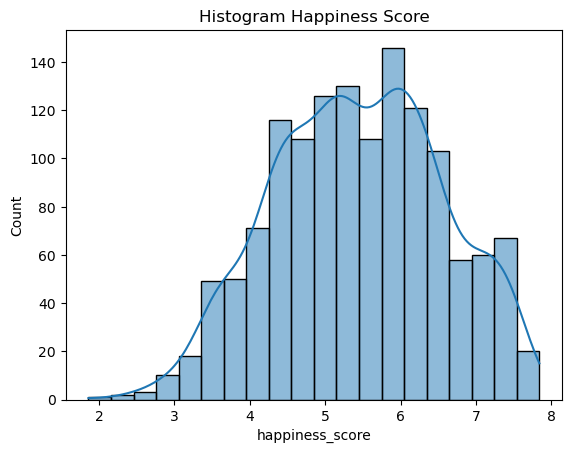

In [38]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['happiness_score'], bins = 20, kde = True)
plt.title('Histogram Happiness Score')

In [39]:
# Check the max value for Happiness_Score
df['happiness_score'].max()

7.842

In [40]:
# Check the min value for Happiness_Score
df['happiness_score'].min()

1.859

In [42]:
# Create a new variable 'Happiness status'
df.loc[df['happiness_score'] < 4, 'happiness_status'] = 'Unhappy Nation'
df.loc[(df['happiness_score'] >= 4) & (df['happiness_score'] < 6), 'happiness_status'] = 'Moderately Happy Nation'
df.loc[df['happiness_score'] >= 6, 'happiness_status'] = 'Happy Nation'

In [43]:
# Checking creation of Exclusion flag 

df['happiness_status'].value_counts(dropna = False)

happiness_status
Moderately Happy Nation    772
Happy Nation               451
Unhappy Nation             144
Name: count, dtype: int64

In [44]:
# Check columns
df.columns

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year', 'overall_rank', 'year_loc',
       'happiness_status'],
      dtype='object')

C:\Users\clany\AppData\Local\Temp\ipykernel_33196\1859912559.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  for axes in g.axes.flat:_= axes.set_xticklabels(axes.get_xticklabels(), rotation=90)


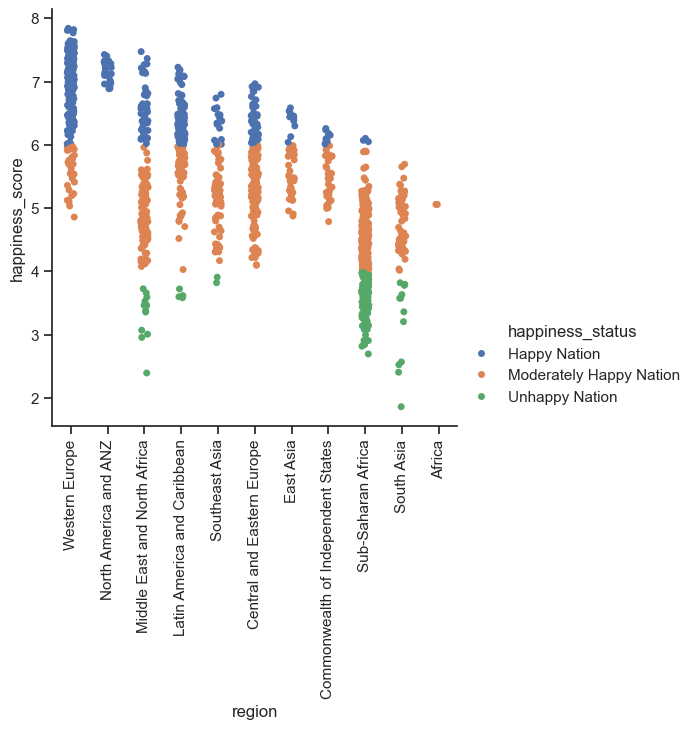

In [46]:
# Create a categorical plot in seaborn using the Happiness status created above
sns.set(style= 'ticks')
g = sns.catplot(x= 'region', y= 'happiness_score', hue= 'happiness_status', data = df)
for axes in g.axes.flat:_= axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

**Observations:**  
From the above categorical plot, it can be deducted that Western Europe has the most happiest nations. 

However, the regions North America and ANZ do not have any middle or low classifications of happiness: they only have happy nations.

Nations with the lowest status in happiness can be seen to be found in South Asia, Middle East and North Africa.  
Sub-Saharan Africa covers the most unhappy nations in volume.

## 7. Revisit Project Questions & Provide answers and hypotheses

### Questions & Answers

**Questions that can be answered after above exploratory analysis**  

***What factors contribute most to a country´s happiness score?***  
GDP_per_Capita, health and social support have strong positive correlations with happiness score, suggesting that nations with higher levels of these 3 factor combinations, tend to be on the top level of happiness. Freedom can also contribute to a higher happiness score, but does not seem to be a leading factor for a nation to be defined as happy.  
The least contribution to happiness can be seen to be ´generosity´(donations to charity), with its consistent low values with all other variables in regards to the level of happiness of a country.  

**What regions have the happiest countries? Lowest happiness scores?**  
Western Europe has the most happiest nations, whilst the regions in North America and ANZ do not have any middle or low classifications of happiness: they only have happy nations!  
Nations with the lowest status in happiness can be seen to be found in South Asia, Middle East and North Africa.
Sub-Saharan Africa covers the most unhappy nations in volume.

### Hypothesis

*Null Hypothesis:* There is no relationship between GDP per Capita, Social Support, Health and Happiness Status  
*Alternative Hypothesis:* Higher GDP per Capita, Social Support and Health causes an increase in Happiness Status  

## 8. Export Dataframe

In [47]:
df.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'World_Happiness_6_2.csv'), index=False)